# Exporation & cleaning dataset

In questo notebook esploriamo i dati del dominio e li puliamo.

Cose da fare: 
1)segnare referenze e definire dominio
2)Aggiustare nomi colonne


In [1]:
pip  install --quiet

Note: you may need to restart the kernel to use updated packages.


ERROR: You must give at least one requirement to install (see "pip help install")
You should consider upgrading via the 'c:\Users\Simone\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_rows', None)

## Prestazioni ambulatoriali Lombardia

https://www.dati.lombardia.it/Sanit-/Prestazioni-Ambulatoriali/d4mg-9zw3

Descrizione colonne: https://github.com/SimoneFarallo/public_and_social_services/blob/main/dataset/prest_amb_documentation.pdf


In [4]:
prest_amb = pd.read_csv('https://raw.githubusercontent.com/SimoneFarallo/public_and_social_services/main/data/prest_amb.csv')
prest_amb.head()

,ANNO_RIF,COD_ASL,ASL,COD_ENTE,ENTE,COD_STRUT,STRUT,TIPO_RAP_SSN,INDIRIZZO,COMUNE_STRUT,...,TIPO_PREST,ATTIVITA,COD_BRANCA_MINSLE,BRANCA_MINSLE,COD_BRANCA_REGLE,BRANCA_REGLE,COD_PREST_AMBLE,PREST_AMBLE,TARIFFA_PREST_EURO,N_PREST
0,2020,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,705,ASST OVEST MILANESE,2340,POLIAMBULATORIALE PARABIAGO,PUBBLICO ACCREDITATO,VIA XI FEBBRAIO N. 31,PARABIAGO,...,LABORATORIO,11,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",112,CHIMICA CLINICA,90115,CALCITONINA,N.T.,17,260.1
1,2020,323,ATS DELLA MONTAGNA,713,ASST DELLA VALTELLINA E DELL'ALTO LARIO,2941,POLIAMBULATORIO OSP. MORBEGNO,PUBBLICO ACCREDITATO,VIA MORELLI 1,MORBEGNO,...,ATT. CLINICA,19,ORTOPEDIA E TRAUMATOLOGIA,191,ORTOPEDIA E TRAUMATOLOGIA,9346,ALTRE TRAZIONI CUTANEE DEGLI ARTI,N.T.,14,162.4
2,2020,327,ATS DELLA VAL PADANA,724,ASST DI CREMONA,3397,POLIAMB. A.O.IST.OSPIT.CREMONA,PUBBLICO ACCREDITATO,VIA LARGO PRIORI N.1,CREMONA,...,LABORATORIO,11,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",114,MICROBIOLOGIA-VIROLOGIA,91085,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,N.T.,453,2627.4
3,2020,328,ATS DI PAVIA,938,FOND. CLINICA DEL LAVORO - PAVIA,2112,POLIAMB. IRCCS MAUGERI,PRIVATO ACCREDITATO,"VIA MAUGERI, 10",PAVIA,...,ATT. CLINICA,22,PNEUMOLOGIA,221,PNEUMOLOGIA,89655,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,N.T.,56,532.0
4,2020,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,707,ASST NORD MILANO,30058,OSPEDALE BASSINI - CINISELLO BALSAMO,PUBBLICO ACCREDITATO,VIA GORKI 50,CINISELLO BALSAMO,...,LABORATORIO,11,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",114,MICROBIOLOGIA-VIROLOGIA,90557,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,N.T.,2,40.0


In [5]:
prest_amb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160891 entries, 0 to 160890
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ANNO_RIF            160891 non-null  int64  
 1   COD_ASL             160891 non-null  int64  
 2   ASL                 160891 non-null  object 
 3   COD_ENTE            160891 non-null  int64  
 4   ENTE                160891 non-null  object 
 5   COD_STRUT           160891 non-null  int64  
 6   STRUT               160891 non-null  object 
 7   TIPO_RAP_SSN        160891 non-null  object 
 8   INDIRIZZO           160891 non-null  object 
 9   COMUNE_STRUT        160891 non-null  object 
 10  PROV_STRUT          160891 non-null  object 
 11  NUM_TEL             160891 non-null  object 
 12  TIPO_PREST          160891 non-null  object 
 13  ATTIVITA            160891 non-null  int64  
 14  COD_BRANCA_MINSLE   160891 non-null  object 
 15  BRANCA_MINSLE       160891 non-nul

In [6]:
import pandas as pd

def contatore(dataset):
    """
    Conta il numero di duplicati, valori nulli e valori unici per ogni colonna di un dataset.
    
    :param dataset: Il dataset da analizzare (pandas DataFrame).
    :return: Un dizionario contenente i risultati per ogni colonna.
    """
    risultati = {}
    for colonna in dataset.columns:
        duplicati = dataset.duplicated(subset=colonna).sum()
        nulli = dataset[colonna].isnull().sum()
        unici = dataset[colonna].nunique()
        risultati[colonna] = {
            'duplicati': duplicati,
            'nulli': nulli,
            'unici': unici
        }
    return risultati

In [7]:
contatore(prest_amb)

{'ANNO_RIF': {'duplicati': 160890, 'nulli': 0, 'unici': 1},
 'COD_ASL': {'duplicati': 160883, 'nulli': 0, 'unici': 8},
 'ASL': {'duplicati': 160883, 'nulli': 0, 'unici': 8},
 'COD_ENTE': {'duplicati': 160830, 'nulli': 0, 'unici': 61},
 'ENTE': {'duplicati': 160830, 'nulli': 0, 'unici': 61},
 'COD_STRUT': {'duplicati': 159790, 'nulli': 0, 'unici': 1101},
 'STRUT': {'duplicati': 159827, 'nulli': 0, 'unici': 1064},
 'TIPO_RAP_SSN': {'duplicati': 160889, 'nulli': 0, 'unici': 2},
 'INDIRIZZO': {'duplicati': 159935, 'nulli': 0, 'unici': 956},
 'COMUNE_STRUT': {'duplicati': 160618, 'nulli': 0, 'unici': 273},
 'PROV_STRUT': {'duplicati': 160879, 'nulli': 0, 'unici': 12},
 'NUM_TEL': {'duplicati': 160887, 'nulli': 0, 'unici': 4},
 'TIPO_PREST': {'duplicati': 160888, 'nulli': 0, 'unici': 3},
 'ATTIVITA': {'duplicati': 160864, 'nulli': 0, 'unici': 27},
 'COD_BRANCA_MINSLE': {'duplicati': 160864, 'nulli': 0, 'unici': 27},
 'BRANCA_MINSLE': {'duplicati': 160845, 'nulli': 0, 'unici': 46},
 'COD_BRAN

In [8]:
#Elimino le colonne che non mi servono
prest_amb = prest_amb.drop(['ANNO_RIF', 'ATTIVITA', 'NUM_TEL', 'PREST_AMBLE','N_PREST'],axis = 1)
prest_amb.columns

Index(['COD_ASL', 'ASL', 'COD_ENTE', 'ENTE', 'COD_STRUT', 'STRUT',
       'TIPO_RAP_SSN', 'INDIRIZZO', 'COMUNE_STRUT', 'PROV_STRUT', 'TIPO_PREST',
       'COD_BRANCA_MINSLE', 'BRANCA_MINSLE', 'COD_BRANCA_REGLE',
       'BRANCA_REGLE', 'COD_PREST_AMBLE', 'TARIFFA_PREST_EURO'],
      dtype='object')

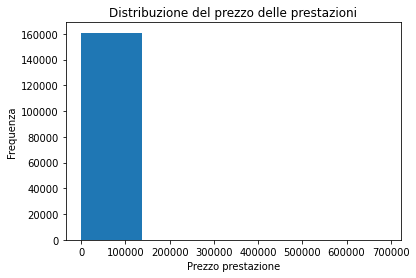

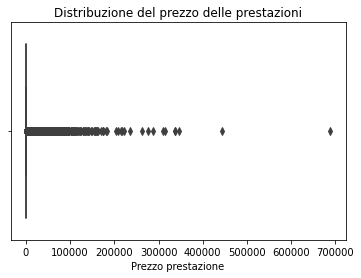

In [9]:
#Analizzo la colonna del prezzo
plt.hist(prest_amb['TARIFFA_PREST_EURO'], bins=5)
plt.xlabel('Prezzo prestazione')
plt.ylabel('Frequenza')
plt.title('Distribuzione del prezzo delle prestazioni')
plt.show()



sns.boxplot(x=prest_amb['TARIFFA_PREST_EURO'])
plt.xlabel('Prezzo prestazione')
plt.title('Distribuzione del prezzo delle prestazioni')
plt.show()

In [10]:
#Non riesco a capire i prezzi, sulla documentazione c'è scritto in euro, ma ci sono valori senza senso, preferiamo elimnare la colonna e trovare un altro prezziario
prest_amb = prest_amb.drop(['TARIFFA_PREST_EURO'],axis = 1)
prest_amb.columns


Index(['COD_ASL', 'ASL', 'COD_ENTE', 'ENTE', 'COD_STRUT', 'STRUT',
       'TIPO_RAP_SSN', 'INDIRIZZO', 'COMUNE_STRUT', 'PROV_STRUT', 'TIPO_PREST',
       'COD_BRANCA_MINSLE', 'BRANCA_MINSLE', 'COD_BRANCA_REGLE',
       'BRANCA_REGLE', 'COD_PREST_AMBLE'],
      dtype='object')

In [11]:
#Prendiamo solo le colonne che potrebbero essere utili
prest_amb = prest_amb[['COD_PREST_AMBLE','BRANCA_REGLE','COD_BRANCA_MINSLE','COD_BRANCA_REGLE','TIPO_PREST','STRUT','COD_STRUT','INDIRIZZO','COMUNE_STRUT','PROV_STRUT','COD_ASL','ASL','ENTE',]]
prest_amb.head()

,COD_PREST_AMBLE,BRANCA_REGLE,COD_BRANCA_MINSLE,COD_BRANCA_REGLE,TIPO_PREST,STRUT,COD_STRUT,INDIRIZZO,COMUNE_STRUT,PROV_STRUT,COD_ASL,ASL,ENTE
0,CALCITONINA,90115,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",CHIMICA CLINICA,LABORATORIO,POLIAMBULATORIALE PARABIAGO,2340,VIA XI FEBBRAIO N. 31,PARABIAGO,MI,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,ASST OVEST MILANESE
1,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ORTOPEDIA E TRAUMATOLOGIA,ORTOPEDIA E TRAUMATOLOGIA,ATT. CLINICA,POLIAMBULATORIO OSP. MORBEGNO,2941,VIA MORELLI 1,MORBEGNO,SO,323,ATS DELLA MONTAGNA,ASST DELLA VALTELLINA E DELL'ALTO LARIO
2,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,POLIAMB. A.O.IST.OSPIT.CREMONA,3397,VIA LARGO PRIORI N.1,CREMONA,CR,327,ATS DELLA VAL PADANA,ASST DI CREMONA
3,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,PNEUMOLOGIA,PNEUMOLOGIA,ATT. CLINICA,POLIAMB. IRCCS MAUGERI,2112,"VIA MAUGERI, 10",PAVIA,PV,328,ATS DI PAVIA,FOND. CLINICA DEL LAVORO - PAVIA
4,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,90557,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,OSPEDALE BASSINI - CINISELLO BALSAMO,30058,VIA GORKI 50,CINISELLO BALSAMO,MI,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,ASST NORD MILANO


In [12]:
#salvare il file
#prest_amb.to_csv('prest_amb_clean.csv', index=False)


## Strutture accreditate

https://www.regione.lombardia.it/wps/portal/istituzionale/HP/DettaglioServizio/servizi-e-informazioni/Cittadini/salute-e-prevenzione/strutture-sanitarie-e-sociosanitarie/strutture-sanitarie-accreditate/strutture-sanitarie-accreditate

In [13]:
strut_accr = pd.read_excel('https://github.com/SimoneFarallo/public_and_social_services/raw/main/data/elenco_strutture_sanitare.xlsx',skiprows = 2)
strut_accr.head()

,Ente,Sede Legale: Indirizzo,Provincia,Sede Legale: Località,Tipo Struttura,Codice Struttura,Denominazione Struttura,Indirizzo,Provincia,Località,CAP,TEL,FAX,ATS,Privata,Abilitata a Cert. Sportiva,Numero Registro Regionale
0,A.D.C. POLIMEDICA SRL,VIA SANT'ANNA 8,MB,BESANA IN BRIANZA,Struttura ambulatoriale,35601,A.D.C. POLIMEDICA SRL,VIA SANT'ANNA 8,MB,BESANA IN BRIANZA,20842,0362995519,0362977412,ATS DELLA BRIANZA,Sì,,616
1,ALLIANCE MEDICAL DIAGNOSTIC SRL,VIA MAMELI 42/A,MB,LISSONE,Struttura ambulatoriale,998,ALLIANCE MEDICAL DIAGNOSTIC - CENTRO RADIOLOG...,VIA G. MAMELI 42/A,MB,LISSONE,20851,0392454279,0392457250,ATS DELLA BRIANZA,Sì,,1277
2,ALLIANCE MEDICAL DIAGNOSTIC SRL,VIA MAMELI 42/A,MB,LISSONE,Struttura ambulatoriale,1026,ALLIANCE MEDICAL DIAGNOSTIC SRL,VIA LOCATELLI 17,MB,CESANO MADERNO,20811,0362521714,NaN,ATS DELLA BRIANZA,Sì,,1277
3,AMBULATORIO ORTOPEDICO FISIOTERAPICO SRL,VIA ORTIGARA N. 1 ANG. VIA MILANO,MB,VIMERCATE,Struttura ambulatoriale,1028,AMBULATORIO ORTOPEDICO FISIOTERAPICO S.R.L.,VIA ORTIGARA N. 1 ANG. VIA MILANO 1,MB,VIMERCATE,20871,039660834,NaN,ATS DELLA BRIANZA,Sì,,1063
4,ANTROPOS SRL,VIA ITALIA 50,MB,MONZA,Struttura psichiatrica,19574,ANTROPOS,VIA PER AGUEGLIO 24,LC,ESINO LARIO,23825,0341860554,0341860554,ATS DELLA BRIANZA,Sì,,777


In [14]:
strut_accr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1026 entries, 0 to 1025
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0    Ente                       1026 non-null   object
 1   Sede Legale: Indirizzo      1026 non-null   object
 2   Provincia                   1023 non-null   object
 3   Sede Legale: Località       1026 non-null   object
 4   Tipo Struttura              1026 non-null   object
 5   Codice Struttura            1026 non-null   int64 
 6   Denominazione Struttura     1026 non-null   object
 7   Indirizzo                   1026 non-null   object
 8   Provincia                   1026 non-null   object
 9   Località                    1026 non-null   object
 10  CAP                         1026 non-null   int64 
 11  TEL                         885 non-null    object
 12  FAX                         722 non-null    object
 13   ATS                        1026 non-null   obje

In [15]:
contatore(strut_accr)

{' Ente': {'duplicati': 516, 'nulli': 0, 'unici': 510},
 'Sede Legale: Indirizzo': {'duplicati': 522, 'nulli': 0, 'unici': 504},
 'Provincia': {'duplicati': 1002, 'nulli': 3, 'unici': 23},
 'Sede Legale: Località': {'duplicati': 833, 'nulli': 0, 'unici': 193},
 'Tipo Struttura': {'duplicati': 1017, 'nulli': 0, 'unici': 9},
 'Codice Struttura': {'duplicati': 0, 'nulli': 0, 'unici': 1026},
 'Denominazione Struttura': {'duplicati': 20, 'nulli': 0, 'unici': 1006},
 'Indirizzo ': {'duplicati': 62, 'nulli': 0, 'unici': 964},
 'Provincia ': {'duplicati': 1014, 'nulli': 0, 'unici': 12},
 'Località  ': {'duplicati': 673, 'nulli': 0, 'unici': 353},
 'CAP ': {'duplicati': 720, 'nulli': 0, 'unici': 306},
 'TEL': {'duplicati': 225, 'nulli': 141, 'unici': 800},
 'FAX': {'duplicati': 369, 'nulli': 304, 'unici': 656},
 ' ATS': {'duplicati': 1018, 'nulli': 0, 'unici': 8},
 'Privata': {'duplicati': 1024, 'nulli': 0, 'unici': 2},
 'Abilitata a Cert. Sportiva': {'duplicati': 1024, 'nulli': 0, 'unici': 2},

In [16]:
#Teniamo solo le colonne che ci servono
strut_accr = strut_accr[['Codice Struttura',' Ente','Tipo Struttura','TEL','FAX','Privata']]
strut_accr.head()

,Codice Struttura,Ente,Tipo Struttura,TEL,FAX,Privata
0,35601,A.D.C. POLIMEDICA SRL,Struttura ambulatoriale,0362995519,0362977412,Sì
1,998,ALLIANCE MEDICAL DIAGNOSTIC SRL,Struttura ambulatoriale,0392454279,0392457250,Sì
2,1026,ALLIANCE MEDICAL DIAGNOSTIC SRL,Struttura ambulatoriale,0362521714,NaN,Sì
3,1028,AMBULATORIO ORTOPEDICO FISIOTERAPICO SRL,Struttura ambulatoriale,039660834,NaN,Sì
4,19574,ANTROPOS SRL,Struttura psichiatrica,0341860554,0341860554,Sì


## Transcodifica codice e nomenclatura

https://www.dati.lombardia.it/Sanit-/Transcodifica-Codici-prestazioni/7ugz-vcug

In [17]:
xls = pd.ExcelFile('https://github.com/SimoneFarallo/public_and_social_services/raw/main/data/Transcodifica_codici.xlsx')
cod_SIIS = pd.read_excel(xls, 'Tabella complessiva cod SISS', skiprows = 1)
set_rif = pd.read_excel(xls, 'Tabella sole prestaz per set', skiprows = 1)

In [18]:
cod_SIIS.head()

,TIPO_PRESTAZ,PRESTAZIONE_ID,CD_NOMENCLATORE,PRESTAZIONE_DESC,COD_REGIONALE2,PRESTAZ_AMB_DESC,BRANCA_REG_ID,BRANCA_REG_DESC,PRESTAZ_AMB_SET_RIFERIMENTO_ID,PRESTAZ_AMB_SET_RIFERIMENTO_DESC
0,LABORATORIO,0090011,90.01.1,11 DEOSSICORTISOLO,90011,11 DEOSSICORTISOLO,0112,CHIMICA CLINICA,90011,11 DEOSSICORTISOLO
1,LABORATORIO,0090012,90.01.2,17 ALFA IDROSSIPROGESTERONE (17 OH-P),90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P),0112,CHIMICA CLINICA,90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P)
2,LABORATORIO,0090013,90.01.3,17 CHETOSTEROIDI NELLE URINE 24 H,90013,17 CHETOSTEROIDI [dU],0112,CHIMICA CLINICA,90013,17 CHETOSTEROIDI [dU]
3,LABORATORIO,0090014,90.01.4,17 IDROSSICORTICOIDI NELLE URINE 24 H,90014,17 IDROSSICORTICOIDI [dU],0112,CHIMICA CLINICA,90014,17 IDROSSICORTICOIDI [dU]
4,LABORATORIO,0090352.01,90.35.2,17 OH-P: 5 DOSAGGI SERIATI DOPO STIMOLO,90352,ORMONI: Dosaggi seriati dopo stimolo ( 5 ),0112,CHIMICA CLINICA,90352,ORMONI: Dosaggi seriati dopo stimolo ( 5 )


In [19]:
set_rif.head()

,TIPO_PRESTAZ,PRESTAZIONE_ID,CD_NOMENCLATORE,PRESTAZIONE_DESC,COD_REGIONALE2,PRESTAZ_AMB_DESC,BRANCA_REG_ID,BRANCA_REG_DESC,PRESTAZ_AMB_SET_RIFERIMENTO_ID,PRESTAZ_AMB_SET_RIFERIMENTO_DESC
0,LABORATORIO,0090011,90.01.1,11 DEOSSICORTISOLO,90011,11 DEOSSICORTISOLO,112,CHIMICA CLINICA,90011,11 DEOSSICORTISOLO
1,LABORATORIO,0090012,90.01.2,17 ALFA IDROSSIPROGESTERONE (17 OH-P),90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P),112,CHIMICA CLINICA,90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P)
2,LABORATORIO,0090013,90.01.3,17 CHETOSTEROIDI NELLE URINE 24 H,90013,17 CHETOSTEROIDI [dU],112,CHIMICA CLINICA,90013,17 CHETOSTEROIDI [dU]
3,LABORATORIO,0090014,90.01.4,17 IDROSSICORTICOIDI NELLE URINE 24 H,90014,17 IDROSSICORTICOIDI [dU],112,CHIMICA CLINICA,90014,17 IDROSSICORTICOIDI [dU]
4,LABORATORIO,0090352.01,90.35.2,17 OH-P: 5 DOSAGGI SERIATI DOPO STIMOLO,90352,ORMONI: Dosaggi seriati dopo stimolo ( 5 ),112,CHIMICA CLINICA,90352,ORMONI: Dosaggi seriati dopo stimolo ( 5 )


In [20]:
contatore(cod_SIIS)

{'TIPO_PRESTAZ': {'duplicati': 2820, 'nulli': 0, 'unici': 2},
 'PRESTAZIONE_ID': {'duplicati': 0, 'nulli': 0, 'unici': 2822},
 'CD_NOMENCLATORE': {'duplicati': 646, 'nulli': 0, 'unici': 2176},
 'PRESTAZIONE_DESC': {'duplicati': 0, 'nulli': 0, 'unici': 2822},
 'COD_REGIONALE2': {'duplicati': 664, 'nulli': 0, 'unici': 2158},
 'PRESTAZ_AMB_DESC': {'duplicati': 714, 'nulli': 0, 'unici': 2108},
 'BRANCA_REG_ID': {'duplicati': 2775, 'nulli': 0, 'unici': 47},
 'BRANCA_REG_DESC': {'duplicati': 2774, 'nulli': 0, 'unici': 48},
 'PRESTAZ_AMB_SET_RIFERIMENTO_ID': {'duplicati': 703,
  'nulli': 0,
  'unici': 2119},
 'PRESTAZ_AMB_SET_RIFERIMENTO_DESC': {'duplicati': 787,
  'nulli': 0,
  'unici': 2035}}

In [21]:
contatore(set_rif)

{'TIPO_PRESTAZ': {'duplicati': 2799, 'nulli': 0, 'unici': 2},
 'PRESTAZIONE_ID': {'duplicati': 0, 'nulli': 0, 'unici': 2801},
 'CD_NOMENCLATORE': {'duplicati': 644, 'nulli': 0, 'unici': 2157},
 'PRESTAZIONE_DESC': {'duplicati': 0, 'nulli': 0, 'unici': 2801},
 'COD_REGIONALE2': {'duplicati': 644, 'nulli': 0, 'unici': 2157},
 'PRESTAZ_AMB_DESC': {'duplicati': 694, 'nulli': 0, 'unici': 2107},
 'BRANCA_REG_ID': {'duplicati': 2755, 'nulli': 0, 'unici': 46},
 'BRANCA_REG_DESC': {'duplicati': 2754, 'nulli': 0, 'unici': 47},
 'PRESTAZ_AMB_SET_RIFERIMENTO_ID': {'duplicati': 682,
  'nulli': 0,
  'unici': 2119},
 'PRESTAZ_AMB_SET_RIFERIMENTO_DESC': {'duplicati': 766,
  'nulli': 0,
  'unici': 2035}}

I due dataset franno riferimento alla nomenclatura delle analisi specalistiche ambulatoriale, la differenza tra i due dataset è che il primo fa riferimento al SIIS-.
Il SISS/SAR fornisce i servizi per supportare la prescrizione di ricette elettroniche dematerializzate garantendo la trasmissione sincrona con il sistema SAC di MEF e applicando gli opportuni controlli per garantire la correttezza formale e di contenuto delle prescrizioni. La ricetta dematerializzata nelle fasi di prescrizione ed erogazione si basa unicamente sui dati elettronici disponibili sul SISS e sul Sistema di Accoglienza Centrale (SAC) del Ministero dell?Economia e delle Finanze (MEF).

Quindi teniamo in cosniderazione il primo dataset ottenuto.

In [22]:
cod_SIIS.head()

,TIPO_PRESTAZ,PRESTAZIONE_ID,CD_NOMENCLATORE,PRESTAZIONE_DESC,COD_REGIONALE2,PRESTAZ_AMB_DESC,BRANCA_REG_ID,BRANCA_REG_DESC,PRESTAZ_AMB_SET_RIFERIMENTO_ID,PRESTAZ_AMB_SET_RIFERIMENTO_DESC
0,LABORATORIO,0090011,90.01.1,11 DEOSSICORTISOLO,90011,11 DEOSSICORTISOLO,0112,CHIMICA CLINICA,90011,11 DEOSSICORTISOLO
1,LABORATORIO,0090012,90.01.2,17 ALFA IDROSSIPROGESTERONE (17 OH-P),90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P),0112,CHIMICA CLINICA,90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P)
2,LABORATORIO,0090013,90.01.3,17 CHETOSTEROIDI NELLE URINE 24 H,90013,17 CHETOSTEROIDI [dU],0112,CHIMICA CLINICA,90013,17 CHETOSTEROIDI [dU]
3,LABORATORIO,0090014,90.01.4,17 IDROSSICORTICOIDI NELLE URINE 24 H,90014,17 IDROSSICORTICOIDI [dU],0112,CHIMICA CLINICA,90014,17 IDROSSICORTICOIDI [dU]
4,LABORATORIO,0090352.01,90.35.2,17 OH-P: 5 DOSAGGI SERIATI DOPO STIMOLO,90352,ORMONI: Dosaggi seriati dopo stimolo ( 5 ),0112,CHIMICA CLINICA,90352,ORMONI: Dosaggi seriati dopo stimolo ( 5 )


In [23]:
#Prendo solo le colonne che mi servono
cod_SIIS = cod_SIIS[['PRESTAZ_AMB_SET_RIFERIMENTO_ID','PRESTAZIONE_DESC','PRESTAZ_AMB_DESC']]
cod_SIIS.head()


,PRESTAZ_AMB_SET_RIFERIMENTO_ID,PRESTAZIONE_DESC,PRESTAZ_AMB_DESC
0,90011,11 DEOSSICORTISOLO,11 DEOSSICORTISOLO
1,90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P),17 ALFA IDROSSIPROGESTERONE (17 OH-P)
2,90013,17 CHETOSTEROIDI NELLE URINE 24 H,17 CHETOSTEROIDI [dU]
3,90014,17 IDROSSICORTICOIDI NELLE URINE 24 H,17 IDROSSICORTICOIDI [dU]
4,90352,17 OH-P: 5 DOSAGGI SERIATI DOPO STIMOLO,ORMONI: Dosaggi seriati dopo stimolo ( 5 )


## Nomenclatura e prezzi prestazioni ambulatoriali NAZIONALE

https://www.salute.gov.it/portale/temi/p2_6.jsp?id=1767&area=programmazioneSanitariaLea&menu=lea

In [24]:
nom_nazionale = pd.read_excel('https://github.com/SimoneFarallo/public_and_social_services/raw/main/data/nomenclatore_specialistica_2013_pw.xlsx', skiprows = 4)
nom_nazionale = nom_nazionale[['CODICE','DESCRIZIONE','Unnamed: 4']]
nom_nazionale = nom_nazionale.rename(columns={'Unnamed: 4': 'PREZZO'})
nom_nazionale.head()

,CODICE,DESCRIZIONE,PREZZO
0,03.8,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,51.65
1,03.91,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,103.29
2,03.92,INIEZIONE DI ALTRI FARMACI NEL CANALE VERTEBRALE,103.29
3,04.07.1,RESEZIONE O ASPORTAZIONE DEI NERVI PERIFERICI,51.13
4,04.11.1,BIOPSIA [PERCUTANEA][AGOBIOPSIA] DEI NERVI PER...,51.13


In [25]:
contatore(nom_nazionale)

{'CODICE': {'duplicati': 0, 'nulli': 0, 'unici': 1702},
 'DESCRIZIONE': {'duplicati': 46, 'nulli': 0, 'unici': 1656},
 'PREZZO': {'duplicati': 1135, 'nulli': 0, 'unici': 567}}

In [26]:
# Rimozione dei puntini dalla colonna "Valori"
nom_nazionale['CODICE'] = nom_nazionale['CODICE'].str.replace('.', '')
nom_nazionale.head()

C:\Users\Simone\AppData\Local\Temp\ipykernel_29740\902231783.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nom_nazionale['CODICE'] = nom_nazionale['CODICE'].str.replace('.', '')


,CODICE,DESCRIZIONE,PREZZO
0,038,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,51.65
1,0391,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,103.29
2,0392,INIEZIONE DI ALTRI FARMACI NEL CANALE VERTEBRALE,103.29
3,04071,RESEZIONE O ASPORTAZIONE DEI NERVI PERIFERICI,51.13
4,04111,BIOPSIA [PERCUTANEA][AGOBIOPSIA] DEI NERVI PER...,51.13


# Merging dataset

## Prestazioni + strutture accreditate

In [27]:
merg1 = prest_amb.merge(strut_accr ,how='left', left_on='COD_STRUT', right_on='Codice Struttura')
display(merg1.head(5))

,COD_PREST_AMBLE,BRANCA_REGLE,COD_BRANCA_MINSLE,COD_BRANCA_REGLE,TIPO_PREST,STRUT,COD_STRUT,INDIRIZZO,COMUNE_STRUT,PROV_STRUT,COD_ASL,ASL,ENTE,Codice Struttura,Ente,Tipo Struttura,TEL,FAX,Privata
0,CALCITONINA,90115,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",CHIMICA CLINICA,LABORATORIO,POLIAMBULATORIALE PARABIAGO,2340,VIA XI FEBBRAIO N. 31,PARABIAGO,MI,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,ASST OVEST MILANESE,2340.0,ASST OVEST MILANESE,Struttura ambulatoriale,0331449633,NaN,No
1,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ORTOPEDIA E TRAUMATOLOGIA,ORTOPEDIA E TRAUMATOLOGIA,ATT. CLINICA,POLIAMBULATORIO OSP. MORBEGNO,2941,VIA MORELLI 1,MORBEGNO,SO,323,ATS DELLA MONTAGNA,ASST DELLA VALTELLINA E DELL'ALTO LARIO,NaN,NaN,NaN,NaN,NaN,NaN
2,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,POLIAMB. A.O.IST.OSPIT.CREMONA,3397,VIA LARGO PRIORI N.1,CREMONA,CR,327,ATS DELLA VAL PADANA,ASST DI CREMONA,NaN,NaN,NaN,NaN,NaN,NaN
3,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,PNEUMOLOGIA,PNEUMOLOGIA,ATT. CLINICA,POLIAMB. IRCCS MAUGERI,2112,"VIA MAUGERI, 10",PAVIA,PV,328,ATS DI PAVIA,FOND. CLINICA DEL LAVORO - PAVIA,NaN,NaN,NaN,NaN,NaN,NaN
4,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,90557,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,OSPEDALE BASSINI - CINISELLO BALSAMO,30058,VIA GORKI 50,CINISELLO BALSAMO,MI,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,ASST NORD MILANO,30058.0,ASST NORD MILANO,Struttura di ricovero e cura,02618311,026127543,No


In [28]:
contatore(merg1)

{'COD_PREST_AMBLE': {'duplicati': 158887, 'nulli': 0, 'unici': 2004},
 'BRANCA_REGLE': {'duplicati': 158845, 'nulli': 0, 'unici': 2046},
 'COD_BRANCA_MINSLE': {'duplicati': 160864, 'nulli': 0, 'unici': 27},
 'COD_BRANCA_REGLE': {'duplicati': 160844, 'nulli': 0, 'unici': 47},
 'TIPO_PREST': {'duplicati': 160888, 'nulli': 0, 'unici': 3},
 'STRUT': {'duplicati': 159827, 'nulli': 0, 'unici': 1064},
 'COD_STRUT': {'duplicati': 159790, 'nulli': 0, 'unici': 1101},
 'INDIRIZZO': {'duplicati': 159935, 'nulli': 0, 'unici': 956},
 'COMUNE_STRUT': {'duplicati': 160618, 'nulli': 0, 'unici': 273},
 'PROV_STRUT': {'duplicati': 160879, 'nulli': 0, 'unici': 12},
 'COD_ASL': {'duplicati': 160883, 'nulli': 0, 'unici': 8},
 'ASL': {'duplicati': 160883, 'nulli': 0, 'unici': 8},
 'ENTE': {'duplicati': 160830, 'nulli': 0, 'unici': 61},
 'Codice Struttura': {'duplicati': 160382, 'nulli': 108279, 'unici': 508},
 ' Ente': {'duplicati': 160605, 'nulli': 108279, 'unici': 285},
 'Tipo Struttura': {'duplicati': 160

In [29]:
merg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160891 entries, 0 to 160890
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   COD_PREST_AMBLE    160891 non-null  object 
 1   BRANCA_REGLE       160891 non-null  object 
 2   COD_BRANCA_MINSLE  160891 non-null  object 
 3   COD_BRANCA_REGLE   160891 non-null  object 
 4   TIPO_PREST         160891 non-null  object 
 5   STRUT              160891 non-null  object 
 6   COD_STRUT          160891 non-null  int64  
 7   INDIRIZZO          160891 non-null  object 
 8   COMUNE_STRUT       160891 non-null  object 
 9   PROV_STRUT         160891 non-null  object 
 10  COD_ASL            160891 non-null  int64  
 11  ASL                160891 non-null  object 
 12  ENTE               160891 non-null  object 
 13  Codice Struttura   52612 non-null   float64
 14   Ente              52612 non-null   object 
 15  Tipo Struttura     52612 non-null   object 
 16  TE

In [30]:
merg1.columns

Index(['COD_PREST_AMBLE', 'BRANCA_REGLE', 'COD_BRANCA_MINSLE',
       'COD_BRANCA_REGLE', 'TIPO_PREST', 'STRUT', 'COD_STRUT', 'INDIRIZZO',
       'COMUNE_STRUT', 'PROV_STRUT', 'COD_ASL', 'ASL', 'ENTE',
       'Codice Struttura', ' Ente', 'Tipo Struttura', 'TEL', 'FAX', 'Privata'],
      dtype='object')

In [31]:
check_merg1 = merg1[['COD_STRUT','Codice Struttura','STRUT']]
display(check_merg1.head(20))

,COD_STRUT,Codice Struttura,STRUT
0,2340,2340.0,POLIAMBULATORIALE PARABIAGO
1,2941,NaN,POLIAMBULATORIO OSP. MORBEGNO
2,3397,NaN,POLIAMB. A.O.IST.OSPIT.CREMONA
3,2112,NaN,POLIAMB. IRCCS MAUGERI
4,30058,30058.0,OSPEDALE BASSINI - CINISELLO BALSAMO
5,1054,NaN,CLIN ZUCCHI CARATE POLIAMBULAT
6,30035,30035.0,C.O.F. LANZO HOSPITAL - ALTA VALLE INTELVI
7,3079,NaN,POLIAMBULATORIO OSPEDALE SAN GERARDO
8,985,NaN,LABORATORIO ANALISI C.GOLGI
9,30030,30030.0,OSPEDALE VALDUCE


## Prestazioni + strutture accreditate + transcodifica

In [32]:
merg1.head()

,COD_PREST_AMBLE,BRANCA_REGLE,COD_BRANCA_MINSLE,COD_BRANCA_REGLE,TIPO_PREST,STRUT,COD_STRUT,INDIRIZZO,COMUNE_STRUT,PROV_STRUT,COD_ASL,ASL,ENTE,Codice Struttura,Ente,Tipo Struttura,TEL,FAX,Privata
0,CALCITONINA,90115,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",CHIMICA CLINICA,LABORATORIO,POLIAMBULATORIALE PARABIAGO,2340,VIA XI FEBBRAIO N. 31,PARABIAGO,MI,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,ASST OVEST MILANESE,2340.0,ASST OVEST MILANESE,Struttura ambulatoriale,0331449633,NaN,No
1,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ORTOPEDIA E TRAUMATOLOGIA,ORTOPEDIA E TRAUMATOLOGIA,ATT. CLINICA,POLIAMBULATORIO OSP. MORBEGNO,2941,VIA MORELLI 1,MORBEGNO,SO,323,ATS DELLA MONTAGNA,ASST DELLA VALTELLINA E DELL'ALTO LARIO,NaN,NaN,NaN,NaN,NaN,NaN
2,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,POLIAMB. A.O.IST.OSPIT.CREMONA,3397,VIA LARGO PRIORI N.1,CREMONA,CR,327,ATS DELLA VAL PADANA,ASST DI CREMONA,NaN,NaN,NaN,NaN,NaN,NaN
3,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,PNEUMOLOGIA,PNEUMOLOGIA,ATT. CLINICA,POLIAMB. IRCCS MAUGERI,2112,"VIA MAUGERI, 10",PAVIA,PV,328,ATS DI PAVIA,FOND. CLINICA DEL LAVORO - PAVIA,NaN,NaN,NaN,NaN,NaN,NaN
4,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,90557,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,OSPEDALE BASSINI - CINISELLO BALSAMO,30058,VIA GORKI 50,CINISELLO BALSAMO,MI,321,ATS DELLA CITTA' METROPOLITANA DI MILANO,ASST NORD MILANO,30058.0,ASST NORD MILANO,Struttura di ricovero e cura,02618311,026127543,No


In [34]:
cod_SIIS.head()

,PRESTAZ_AMB_SET_RIFERIMENTO_ID,PRESTAZIONE_DESC,PRESTAZ_AMB_DESC
0,90011,11 DEOSSICORTISOLO,11 DEOSSICORTISOLO
1,90012,17 ALFA IDROSSIPROGESTERONE (17 OH-P),17 ALFA IDROSSIPROGESTERONE (17 OH-P)
2,90013,17 CHETOSTEROIDI NELLE URINE 24 H,17 CHETOSTEROIDI [dU]
3,90014,17 IDROSSICORTICOIDI NELLE URINE 24 H,17 IDROSSICORTICOIDI [dU]
4,90352,17 OH-P: 5 DOSAGGI SERIATI DOPO STIMOLO,ORMONI: Dosaggi seriati dopo stimolo ( 5 )


In [35]:
merg2 = merg1.merge(cod_SIIS ,how='left', left_on='BRANCA_REGLE', right_on='PRESTAZ_AMB_SET_RIFERIMENTO_ID')
display(merg2.head(5))

,COD_PREST_AMBLE,BRANCA_REGLE,COD_BRANCA_MINSLE,COD_BRANCA_REGLE,TIPO_PREST,STRUT,COD_STRUT,INDIRIZZO,COMUNE_STRUT,PROV_STRUT,...,ENTE,Codice Struttura,Ente,Tipo Struttura,TEL,FAX,Privata,PRESTAZ_AMB_SET_RIFERIMENTO_ID,PRESTAZIONE_DESC,PRESTAZ_AMB_DESC
0,CALCITONINA,90115,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",CHIMICA CLINICA,LABORATORIO,POLIAMBULATORIALE PARABIAGO,2340,VIA XI FEBBRAIO N. 31,PARABIAGO,MI,...,ASST OVEST MILANESE,2340.0,ASST OVEST MILANESE,Struttura ambulatoriale,0331449633,NaN,No,90115,CALCITONINA,CALCITONINA
1,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ORTOPEDIA E TRAUMATOLOGIA,ORTOPEDIA E TRAUMATOLOGIA,ATT. CLINICA,POLIAMBULATORIO OSP. MORBEGNO,2941,VIA MORELLI 1,MORBEGNO,SO,...,ASST DELLA VALTELLINA E DELL'ALTO LARIO,NaN,NaN,NaN,NaN,NaN,NaN,9346,TRAZIONI CUTANEE DEGLI ARTI,ALTRE TRAZIONI CUTANEE DEGLI ARTI
2,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,POLIAMB. A.O.IST.OSPIT.CREMONA,3397,VIA LARGO PRIORI N.1,CREMONA,CR,...,ASST DI CREMONA,NaN,NaN,NaN,NaN,NaN,NaN,91085,STREPTOCOCCO: RICERCA ANTICORPI ANTI ANTISTREP...,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...
3,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,PNEUMOLOGIA,PNEUMOLOGIA,ATT. CLINICA,POLIAMB. IRCCS MAUGERI,2112,"VIA MAUGERI, 10",PAVIA,PV,...,FOND. CLINICA DEL LAVORO - PAVIA,NaN,NaN,NaN,NaN,NaN,NaN,89655,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...
4,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,90557,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,OSPEDALE BASSINI - CINISELLO BALSAMO,30058,VIA GORKI 50,CINISELLO BALSAMO,MI,...,ASST NORD MILANO,30058.0,ASST NORD MILANO,Struttura di ricovero e cura,02618311,026127543,No,NaN,NaN,NaN


In [ ]:
cod_SIIS

## Prestazioni + strutture accreditate + transcodifica + prezziario nazionale

In [36]:
nom_nazionale.head()

,CODICE,DESCRIZIONE,PREZZO
0,038,INIEZIONE DI FARMACI CITOTOSSICI NEL CANALE VE...,51.65
1,0391,INIEZIONE DI ANESTETICO NEL CANALE VERTEBRALE ...,103.29
2,0392,INIEZIONE DI ALTRI FARMACI NEL CANALE VERTEBRALE,103.29
3,04071,RESEZIONE O ASPORTAZIONE DEI NERVI PERIFERICI,51.13
4,04111,BIOPSIA [PERCUTANEA][AGOBIOPSIA] DEI NERVI PER...,51.13


In [37]:
merg2.head()

,COD_PREST_AMBLE,BRANCA_REGLE,COD_BRANCA_MINSLE,COD_BRANCA_REGLE,TIPO_PREST,STRUT,COD_STRUT,INDIRIZZO,COMUNE_STRUT,PROV_STRUT,...,ENTE,Codice Struttura,Ente,Tipo Struttura,TEL,FAX,Privata,PRESTAZ_AMB_SET_RIFERIMENTO_ID,PRESTAZIONE_DESC,PRESTAZ_AMB_DESC
0,CALCITONINA,90115,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",CHIMICA CLINICA,LABORATORIO,POLIAMBULATORIALE PARABIAGO,2340,VIA XI FEBBRAIO N. 31,PARABIAGO,MI,...,ASST OVEST MILANESE,2340.0,ASST OVEST MILANESE,Struttura ambulatoriale,0331449633,NaN,No,90115,CALCITONINA,CALCITONINA
1,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ORTOPEDIA E TRAUMATOLOGIA,ORTOPEDIA E TRAUMATOLOGIA,ATT. CLINICA,POLIAMBULATORIO OSP. MORBEGNO,2941,VIA MORELLI 1,MORBEGNO,SO,...,ASST DELLA VALTELLINA E DELL'ALTO LARIO,NaN,NaN,NaN,NaN,NaN,NaN,9346,TRAZIONI CUTANEE DEGLI ARTI,ALTRE TRAZIONI CUTANEE DEGLI ARTI
2,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,POLIAMB. A.O.IST.OSPIT.CREMONA,3397,VIA LARGO PRIORI N.1,CREMONA,CR,...,ASST DI CREMONA,NaN,NaN,NaN,NaN,NaN,NaN,91085,STREPTOCOCCO: RICERCA ANTICORPI ANTI ANTISTREP...,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...
3,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,PNEUMOLOGIA,PNEUMOLOGIA,ATT. CLINICA,POLIAMB. IRCCS MAUGERI,2112,"VIA MAUGERI, 10",PAVIA,PV,...,FOND. CLINICA DEL LAVORO - PAVIA,NaN,NaN,NaN,NaN,NaN,NaN,89655,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...
4,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,90557,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,OSPEDALE BASSINI - CINISELLO BALSAMO,30058,VIA GORKI 50,CINISELLO BALSAMO,MI,...,ASST NORD MILANO,30058.0,ASST NORD MILANO,Struttura di ricovero e cura,02618311,026127543,No,NaN,NaN,NaN


In [38]:
merg3 = merg2.merge(nom_nazionale ,how='left', left_on='BRANCA_REGLE', right_on='CODICE')
display(merg3.head(5))

,COD_PREST_AMBLE,BRANCA_REGLE,COD_BRANCA_MINSLE,COD_BRANCA_REGLE,TIPO_PREST,STRUT,COD_STRUT,INDIRIZZO,COMUNE_STRUT,PROV_STRUT,...,Tipo Struttura,TEL,FAX,Privata,PRESTAZ_AMB_SET_RIFERIMENTO_ID,PRESTAZIONE_DESC,PRESTAZ_AMB_DESC,CODICE,DESCRIZIONE,PREZZO
0,CALCITONINA,90115,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",CHIMICA CLINICA,LABORATORIO,POLIAMBULATORIALE PARABIAGO,2340,VIA XI FEBBRAIO N. 31,PARABIAGO,MI,...,Struttura ambulatoriale,0331449633,NaN,No,90115,CALCITONINA,CALCITONINA,90115,CALCITONINA,14.56
1,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ORTOPEDIA E TRAUMATOLOGIA,ORTOPEDIA E TRAUMATOLOGIA,ATT. CLINICA,POLIAMBULATORIO OSP. MORBEGNO,2941,VIA MORELLI 1,MORBEGNO,SO,...,NaN,NaN,NaN,NaN,9346,TRAZIONI CUTANEE DEGLI ARTI,ALTRE TRAZIONI CUTANEE DEGLI ARTI,9346,ALTRE TRAZIONI CUTANEE DEGLI ARTI,11.36
2,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,POLIAMB. A.O.IST.OSPIT.CREMONA,3397,VIA LARGO PRIORI N.1,CREMONA,CR,...,NaN,NaN,NaN,NaN,91085,STREPTOCOCCO: RICERCA ANTICORPI ANTI ANTISTREP...,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,91085,STREPTOCOCCO ANTICORPI ANTI ANTISTREPTOLISINA-...,4.85
3,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,PNEUMOLOGIA,PNEUMOLOGIA,ATT. CLINICA,POLIAMB. IRCCS MAUGERI,2112,"VIA MAUGERI, 10",PAVIA,PV,...,NaN,NaN,NaN,NaN,89655,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,89655,MONITORAGGIO INCRUENTO DELLA SATURAZIONE ARTER...,9.30
4,TEST ANTIGENICI (RAPID DIAGNOSTICS TEST Ag-RDT...,90557,"LABORATORIO ANALISI CHIMICO-CLINICHE, MICROBIO...",MICROBIOLOGIA-VIROLOGIA,LABORATORIO,OSPEDALE BASSINI - CINISELLO BALSAMO,30058,VIA GORKI 50,CINISELLO BALSAMO,MI,...,Struttura di ricovero e cura,02618311,026127543,No,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
merg3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248429 entries, 0 to 248428
Data columns (total 25 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   COD_PREST_AMBLE                 248429 non-null  object 
 1   BRANCA_REGLE                    248429 non-null  object 
 2   COD_BRANCA_MINSLE               248429 non-null  object 
 3   COD_BRANCA_REGLE                248429 non-null  object 
 4   TIPO_PREST                      248429 non-null  object 
 5   STRUT                           248429 non-null  object 
 6   COD_STRUT                       248429 non-null  int64  
 7   INDIRIZZO                       248429 non-null  object 
 8   COMUNE_STRUT                    248429 non-null  object 
 9   PROV_STRUT                      248429 non-null  object 
 10  COD_ASL                         248429 non-null  int64  
 11  ASL                             248429 non-null  object 
 12  ENTE            

In [40]:
contatore(merg3)

{'COD_PREST_AMBLE': {'duplicati': 246425, 'nulli': 0, 'unici': 2004},
 'BRANCA_REGLE': {'duplicati': 246383, 'nulli': 0, 'unici': 2046},
 'COD_BRANCA_MINSLE': {'duplicati': 248402, 'nulli': 0, 'unici': 27},
 'COD_BRANCA_REGLE': {'duplicati': 248382, 'nulli': 0, 'unici': 47},
 'TIPO_PREST': {'duplicati': 248426, 'nulli': 0, 'unici': 3},
 'STRUT': {'duplicati': 247365, 'nulli': 0, 'unici': 1064},
 'COD_STRUT': {'duplicati': 247328, 'nulli': 0, 'unici': 1101},
 'INDIRIZZO': {'duplicati': 247473, 'nulli': 0, 'unici': 956},
 'COMUNE_STRUT': {'duplicati': 248156, 'nulli': 0, 'unici': 273},
 'PROV_STRUT': {'duplicati': 248417, 'nulli': 0, 'unici': 12},
 'COD_ASL': {'duplicati': 248421, 'nulli': 0, 'unici': 8},
 'ASL': {'duplicati': 248421, 'nulli': 0, 'unici': 8},
 'ENTE': {'duplicati': 248368, 'nulli': 0, 'unici': 61},
 'Codice Struttura': {'duplicati': 247920, 'nulli': 161138, 'unici': 508},
 ' Ente': {'duplicati': 248143, 'nulli': 161138, 'unici': 285},
 'Tipo Struttura': {'duplicati': 248